In [5]:
%matplotlib inline
#import pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 12))

import lazyqt

In [6]:
filename = b'/data/CAMHDA301-20160724T030000Z.mov'
frame_number=7000

In [7]:
%%time
info = lazyqt.movie_info(filename)
print(info)

{'duration': 839.5720825195312, 'num_frames': 25162, 'valid': True}
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.4 ms


In [8]:
%%time
frame = lazyqt.get_frame(filename, frame_number)

CPU times: user 184 ms, sys: 20 ms, total: 204 ms
Wall time: 248 ms


In [9]:
%%time
url = b'https://github.com/amarburg/go-lazyfs-testfiles/raw/master/CamHD_Vent_Short.mov'
info = lazyqt.movie_info(url)
print(info)
frame = lazyqt.get_frame(url, 1)

{'duration': 0.0, 'num_frames': 0, 'valid': False}
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 385 µs


TypeError: Invalid dimensions for image data

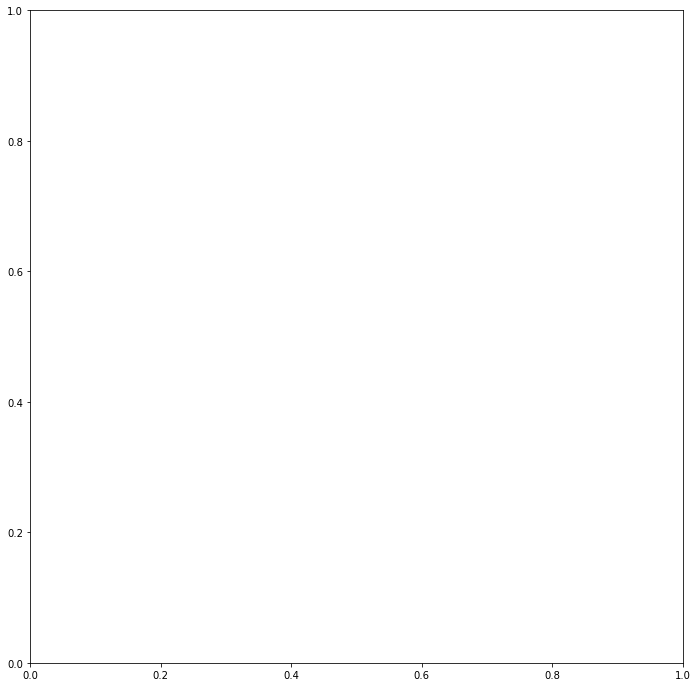

In [10]:
imgplot = plt.imshow(frame)